# LIB'S

In [221]:
import           pandas           as pd
import           kaggle           as kg
import           numpy            as np
import           seaborn          as sns

import matplotlib.pyplot          as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# HELPER FUNCTIONS

In [151]:
#plot graficos
def plotar_barplot (titulo, labelx, labely, dataset):
    plt.figure(figsize=(16, 4))
    ax = sns.barplot(data = dataset, color = 'steelblue')
    sns.despine(bottom=True, left=True)
    ax.set_title(titulo, fontsize=16, color = 'dimgrey', pad = 20)
    ax.set_xlabel(labelx, fontsize = 12, color = 'grey', labelpad = 20)
    ax.set_ylabel(labely, fontsize = 12, color = 'grey', labelpad = 20)
    ax = ax

# DATASET'S

In [2]:
# Download do dataset do Kaggle
kg.api.authenticate()
kg.api.dataset_download_files(dataset="Sírio-Libanes/covid19", path='gt.zip', unzip=True)

# Lendo o arquivo
df = pd.read_excel('gt.zip/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx', engine='openpyxl')
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


# VERIFICANDO DATASET

In [3]:
# Tamanho
df.shape

(1925, 231)

In [4]:
# Descricão dos dados
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Colunas
for i in df.columns:
    print (i)

PATIENT_VISIT_IDENTIFIER
AGE_ABOVE65
AGE_PERCENTIL
GENDER
DISEASE GROUPING 1
DISEASE GROUPING 2
DISEASE GROUPING 3
DISEASE GROUPING 4
DISEASE GROUPING 5
DISEASE GROUPING 6
HTN
IMMUNOCOMPROMISED
OTHER
ALBUMIN_MEDIAN
ALBUMIN_MEAN
ALBUMIN_MIN
ALBUMIN_MAX
ALBUMIN_DIFF
BE_ARTERIAL_MEDIAN
BE_ARTERIAL_MEAN
BE_ARTERIAL_MIN
BE_ARTERIAL_MAX
BE_ARTERIAL_DIFF
BE_VENOUS_MEDIAN
BE_VENOUS_MEAN
BE_VENOUS_MIN
BE_VENOUS_MAX
BE_VENOUS_DIFF
BIC_ARTERIAL_MEDIAN
BIC_ARTERIAL_MEAN
BIC_ARTERIAL_MIN
BIC_ARTERIAL_MAX
BIC_ARTERIAL_DIFF
BIC_VENOUS_MEDIAN
BIC_VENOUS_MEAN
BIC_VENOUS_MIN
BIC_VENOUS_MAX
BIC_VENOUS_DIFF
BILLIRUBIN_MEDIAN
BILLIRUBIN_MEAN
BILLIRUBIN_MIN
BILLIRUBIN_MAX
BILLIRUBIN_DIFF
BLAST_MEDIAN
BLAST_MEAN
BLAST_MIN
BLAST_MAX
BLAST_DIFF
CALCIUM_MEDIAN
CALCIUM_MEAN
CALCIUM_MIN
CALCIUM_MAX
CALCIUM_DIFF
CREATININ_MEDIAN
CREATININ_MEAN
CREATININ_MIN
CREATININ_MAX
CREATININ_DIFF
FFA_MEDIAN
FFA_MEAN
FFA_MIN
FFA_MAX
FFA_DIFF
GGT_MEDIAN
GGT_MEAN
GGT_MIN
GGT_MAX
GGT_DIFF
GLUCOSE_MEDIAN
GLUCOSE_MEAN
GLUCOSE_MIN


In [6]:
#Valores nulos
df.isna().sum().sum()

223863

# ANÁLISES MACROS

In [34]:
colunas = ['PATIENT_VISIT_IDENTIFIER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2','DISEASE GROUPING 3','DISEASE GROUPING 4','DISEASE GROUPING 5','DISEASE GROUPING 6']

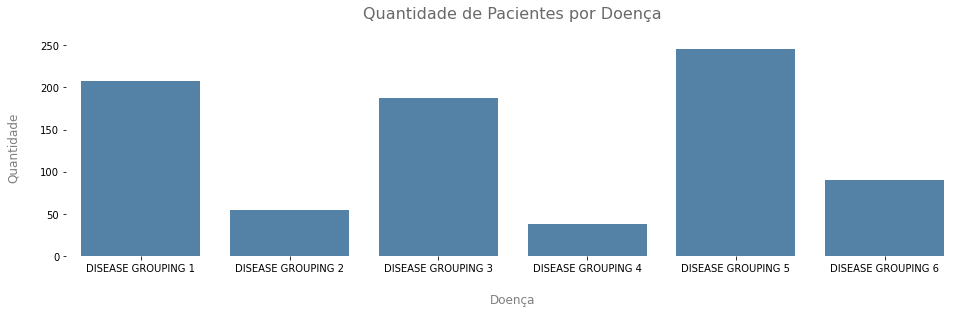

In [152]:
a = pd.DataFrame(df[colunas].groupby('PATIENT_VISIT_IDENTIFIER', as_index=False).sum().sum())[1:].T

plotar_barplot('Quantidade de Pacientes por Doença', 'Doença', 'Quantidade', a)

<AxesSubplot:xlabel='ICU', ylabel='ALBUMIN_MEAN'>

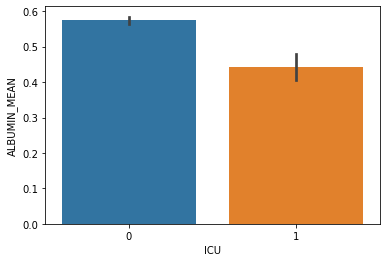

In [208]:
sns.barplot(data = df[['ALBUMIN_MEAN', 'ICU']], y='ALBUMIN_MEAN', x='ICU')

In [225]:
temp = ['TEMPERATURE_MEAN',
'TEMPERATURE_MEDIAN',
'TEMPERATURE_MIN',
'TEMPERATURE_MAX',
'TEMPERATURE_DIFF',
'TEMPERATURE_DIFF_REL']

df[temp]


,TEMPERATURE_MEAN,TEMPERATURE_MEDIAN,TEMPERATURE_MIN,TEMPERATURE_MAX,TEMPERATURE_DIFF,TEMPERATURE_DIFF_REL
0,-0.285714,-0.285714,0.208791,-0.420290,-1.000000,-1.000000
1,0.535714,0.535714,0.714286,0.246377,-1.000000,-1.000000
2,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.107143,-0.107143,0.318681,-0.275362,-1.000000,-1.000000
4,0.033779,0.035714,0.098901,0.362319,-0.238095,-0.242282
...,...,...,...,...,...,...
1920,0.535714,0.535714,0.714286,0.246377,-1.000000,-1.000000
1921,0.142857,0.142857,0.472527,-0.072464,-1.000000,-1.000000
1922,0.142857,0.142857,0.472527,-0.072464,-1.000000,-1.000000
1923,0.285714,0.285714,0.560440,0.043478,-1.000000,-1.000000


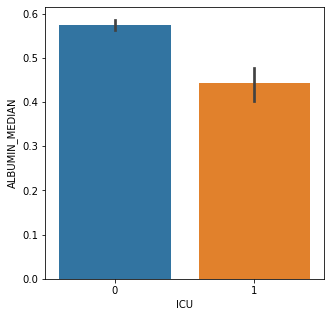

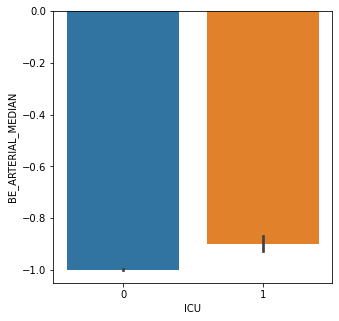

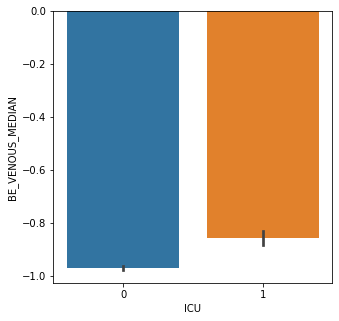

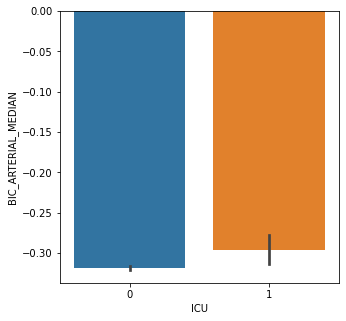

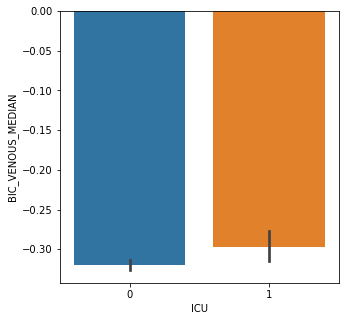

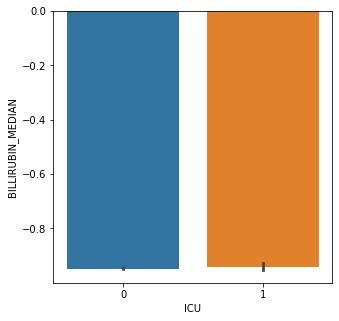

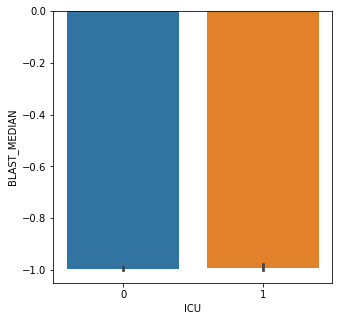

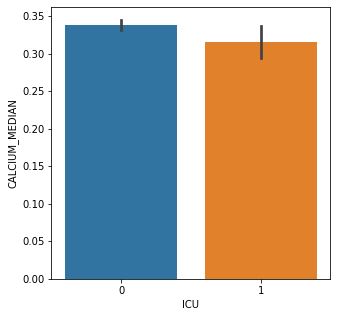

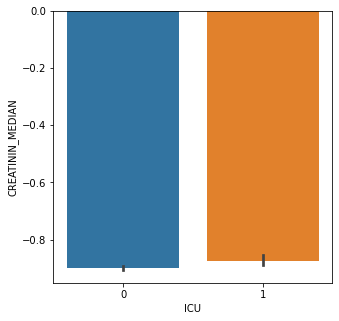

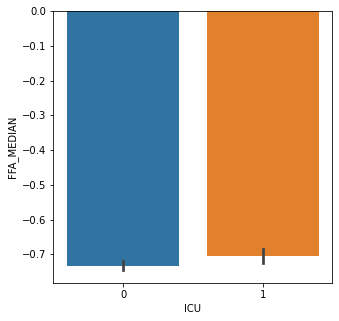

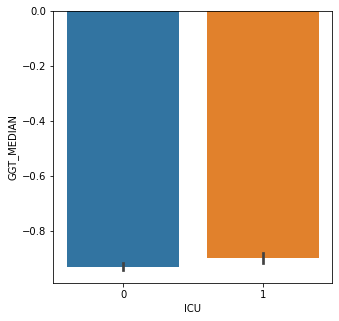

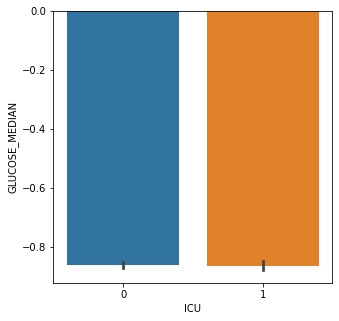

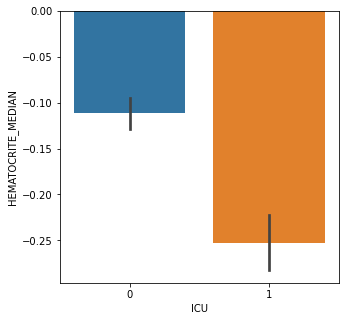

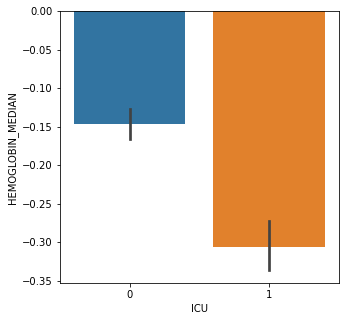

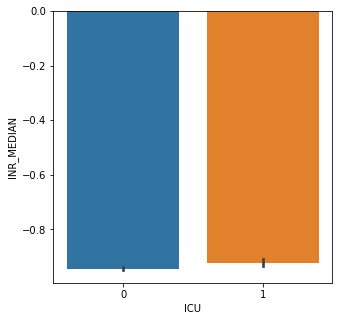

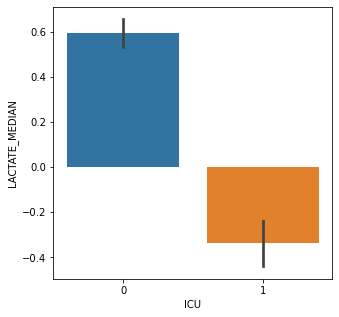

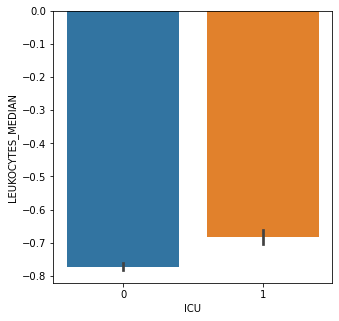

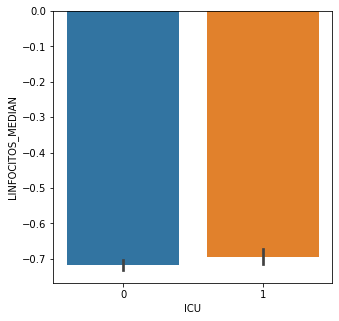

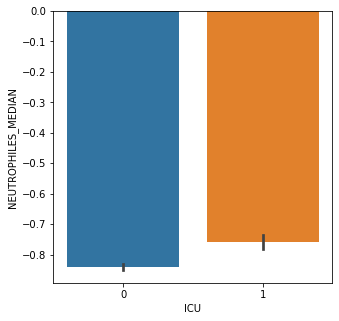

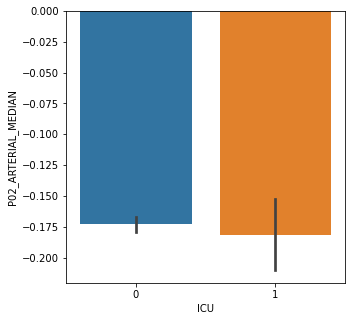

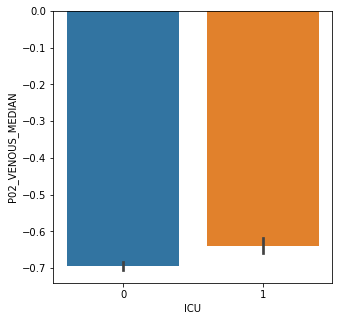

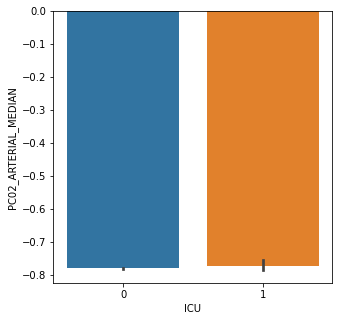

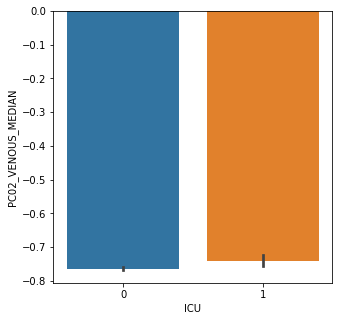

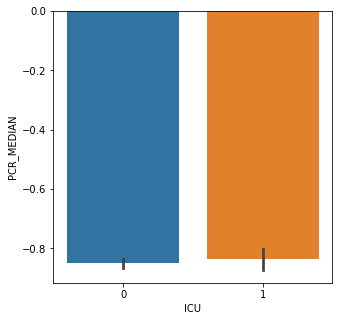

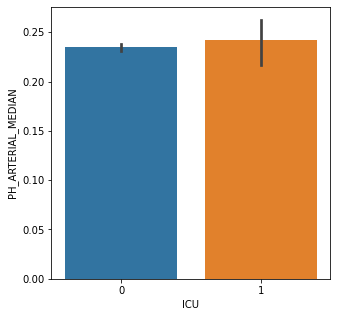

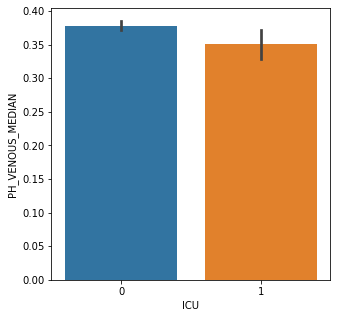

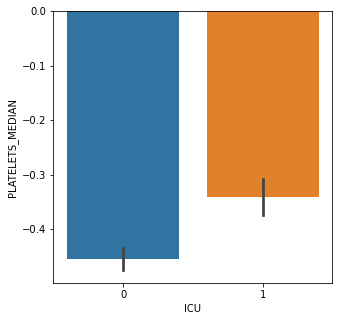

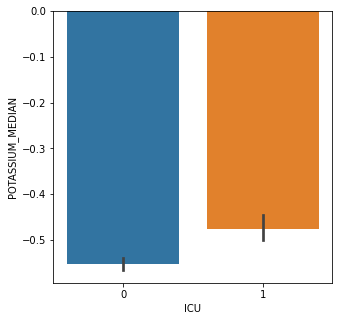

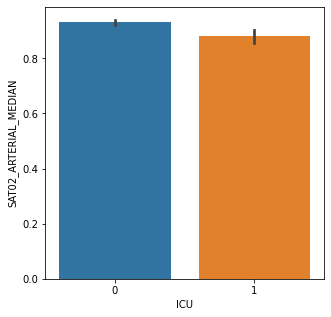

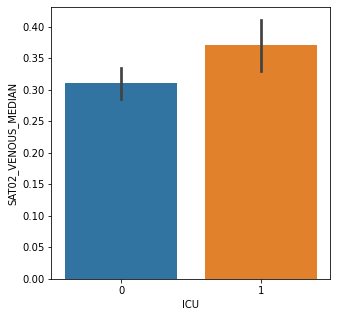

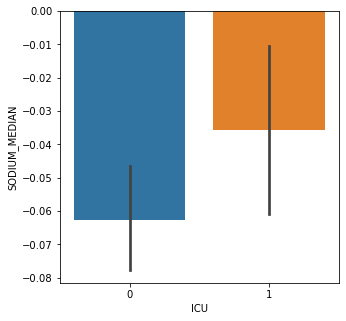

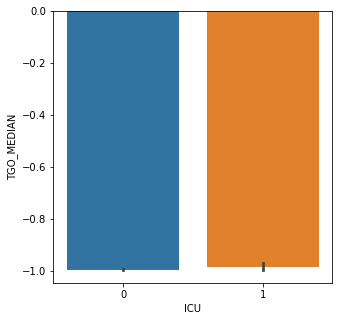

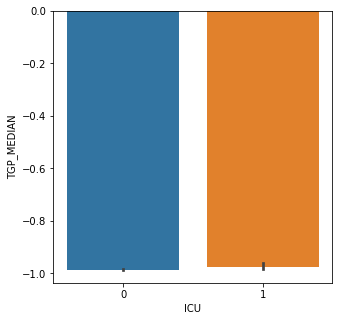

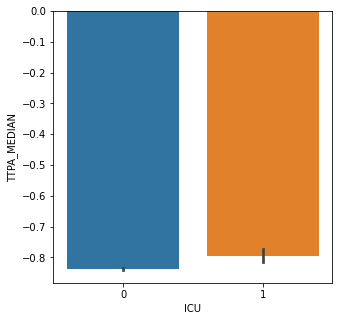

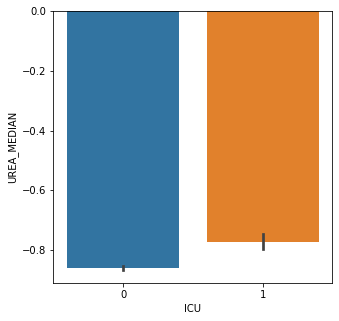

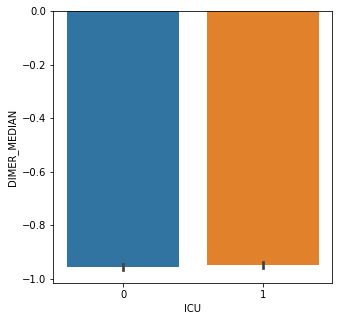

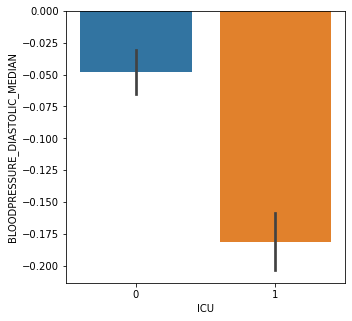

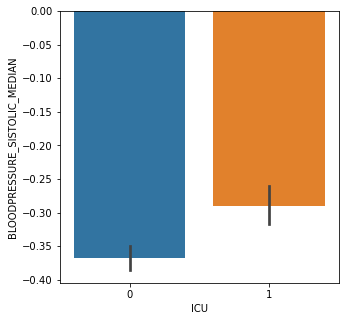

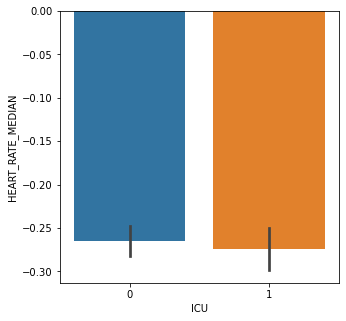

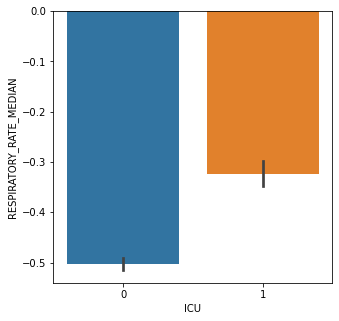

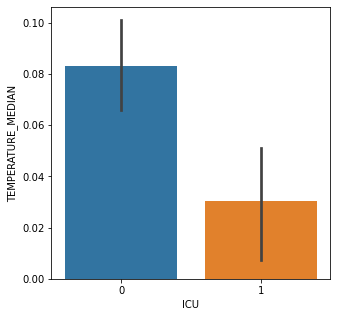

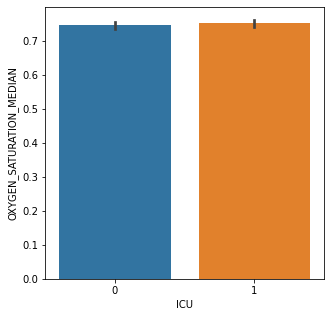

In [202]:
for i in df.columns:
    if 'MEDIAN' in i:
        plt.figure(figsize=(5,5))
        sns.barplot(data = df[[i, 'ICU']], y=i, x='ICU')